# Plotly
- 

In [2]:
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.express as px

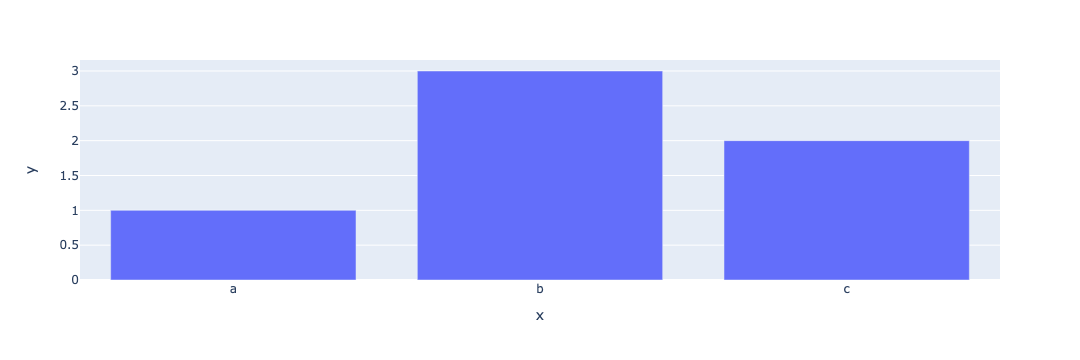

In [3]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [4]:
mtcars = data('mtcars')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


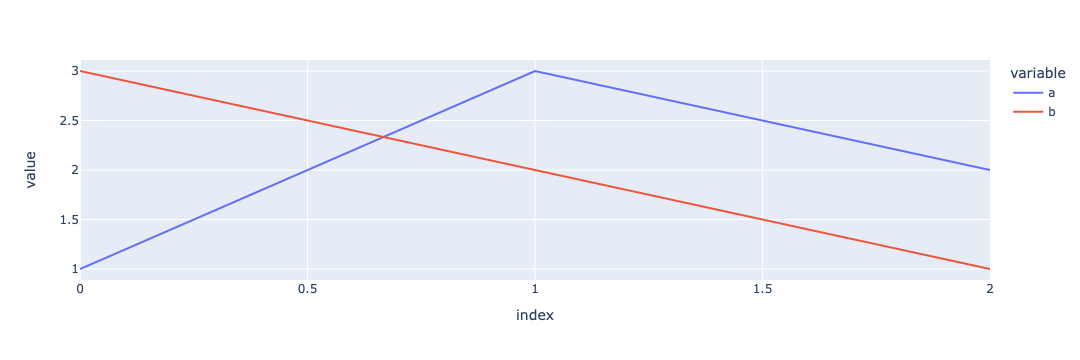

In [5]:
pd.options.plotting.backend = "plotly"

df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))
fig = df.plot()
fig.show()

In [17]:
gearCount = mtcars.groupby('gear', as_index=False).size()
gearCount['gear'] = gearCount['gear'].astype('string')

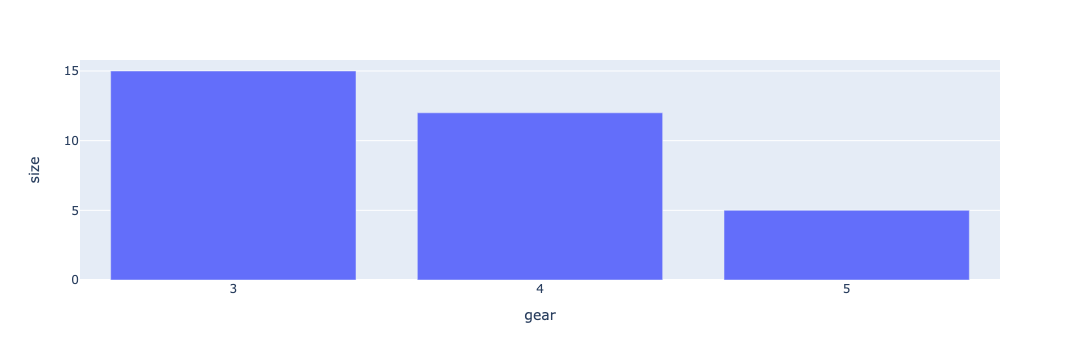

In [18]:
fig = gearCount.plot.bar(x='gear', y='size')
fig.show()

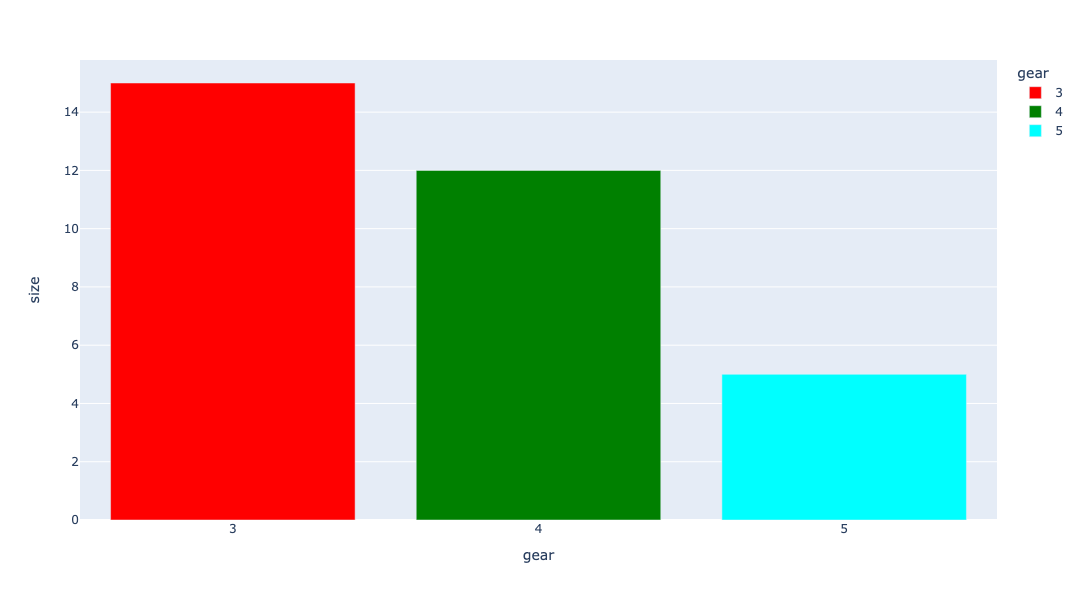

In [20]:
fig2 = px.bar(gearCount, x='gear', y='size', color='gear', color_discrete_map={'3': 'red','4': 'green', '5':'cyan'}, \
              width=800, height=600)
fig2.show()

In [23]:
gearCylCount = mtcars.groupby(['gear','cyl'], as_index=False).size()
gearCylCount[['gear','cyl']] = gearCylCount[['gear','cyl']].astype('string')
gearCylCount

,gear,cyl,size
0,3,4,1
1,3,6,2
2,3,8,12
3,4,4,8
4,4,6,4
5,5,4,2
6,5,6,1
7,5,8,2


In [ ]:
fig=px.bar(bank_data,x="job",y="count",color="y",barmode='group')
fig.show()

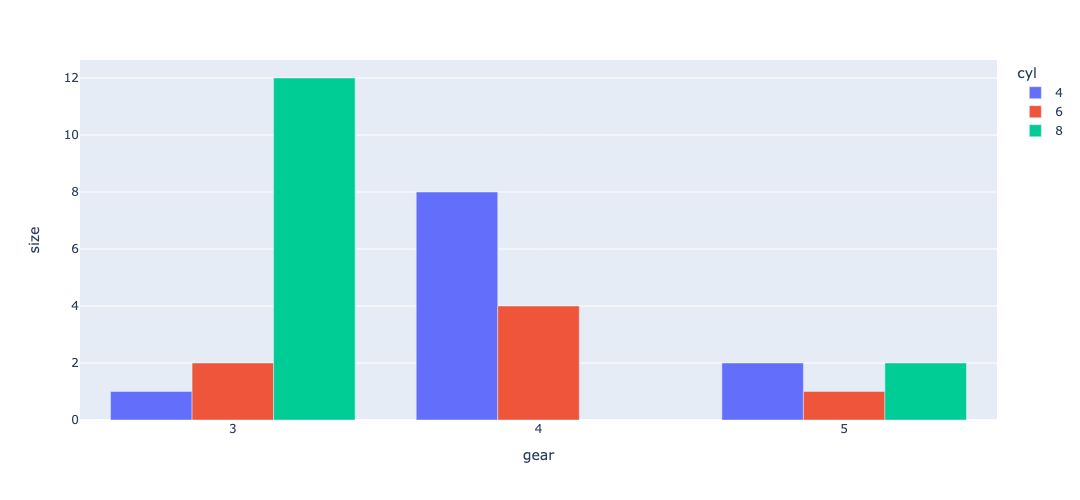

In [35]:
fig = gearCylCount.plot.bar(x='gear', y='size', barmode='group', color='cyl', height=500, width=900)
fig.show()

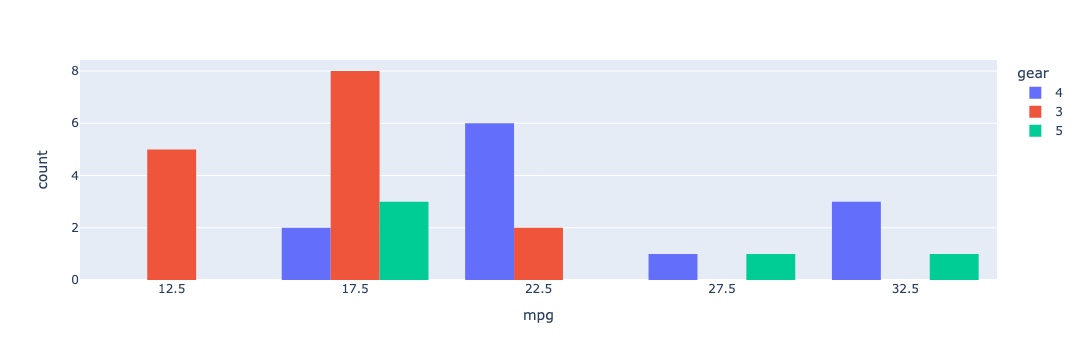

In [36]:
fig = px.histogram(mtcars ,x="mpg", color="gear", barmode='group')
fig.show()

## Heatmap
- https://python-charts.com/correlation/heatmap-plotly/

In [42]:
data = gearCylCount.values
data

array([['3', '4', 1],
       ['3', '6', 2],
       ['3', '8', 12],
       ['4', '4', 8],
       ['4', '6', 4],
       ['5', '4', 2],
       ['5', '6', 1],
       ['5', '8', 2]], dtype=object)

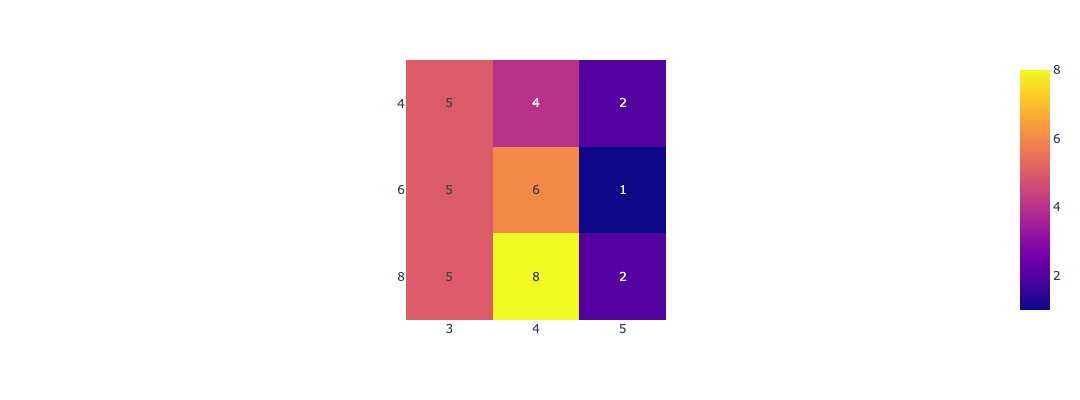

In [67]:
fig = px.imshow(data, width=600, height=400,x=gearCylCount.gear.unique().tolist(), y=gearCylCount.cyl.tolist(), text_auto=True)
fig.show()

In [82]:
#mtcars.pivot(index='cyl', columns='gear', values='am')
gearCylCount2 = mtcars.reset_index(drop=True).astype('string').pivot_table(index='gear', columns='cyl', values='am', aggfunc='count').fillna(0)
gearCylCount2

cyl,4,6,8
gear,,,
3,1.0,2.0,12.0
4,8.0,4.0,0.0
5,2.0,1.0,2.0


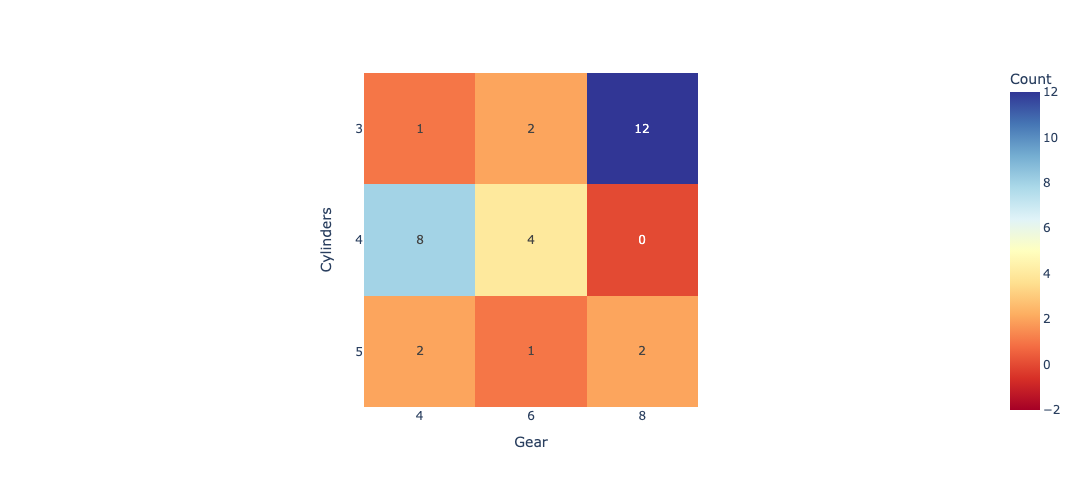

In [91]:
fig = px.imshow(gearCylCount2, x=gearCylCount2.columns, y=gearCylCount2.index, text_auto=True , \
                labels = dict(x = "Gear", y = "Cylinders", color = "Count"), color_continuous_scale = 'RdYlBu', 
                color_continuous_midpoint = 5)

fig.update_layout(width=500,height=500)
fig.show()

## Bubble Chart
- 

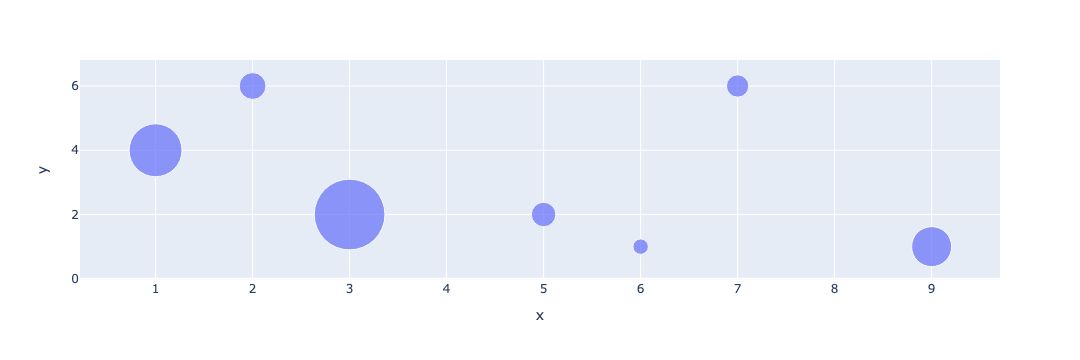

In [92]:
fig = px.scatter(x = [5, 7, 3, 6, 1, 9, 2],
                 y = [2, 6, 2, 1, 4, 1, 6],
                 size = [30, 25, 250, 12, 140, 80, 36],
                 size_max = 50)

fig.show()

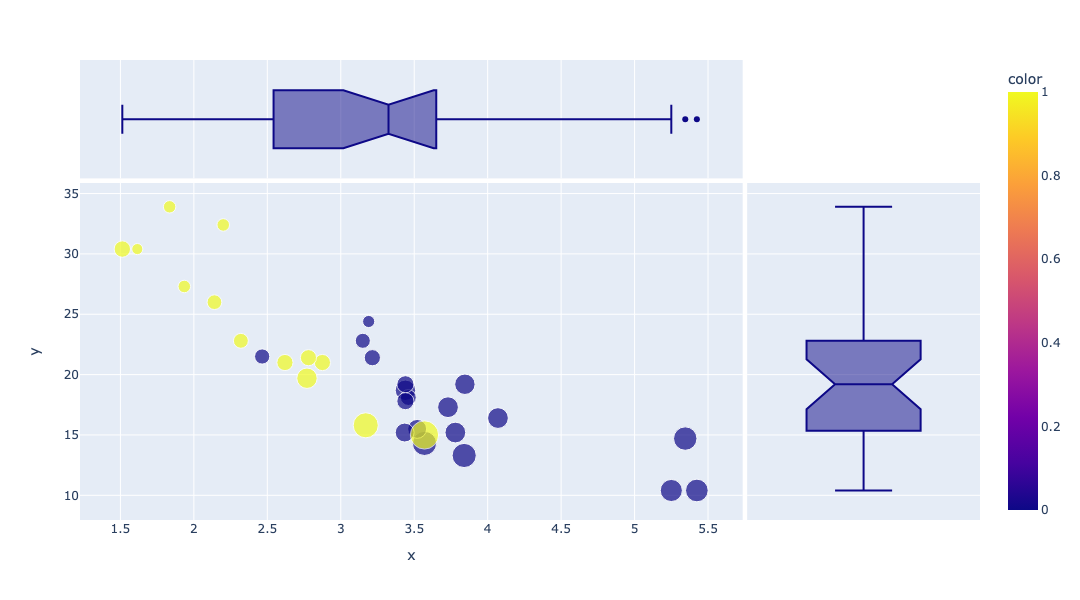

In [104]:
fig = px.scatter(x=mtcars.wt, y=mtcars.mpg, size=mtcars.hp, height=600, width=800, size_max=20, color=mtcars.am, \
                marginal_x = "box", marginal_y = "box")
fig.show()